# Dimensionality Reduction

In this notebook we try a different approach from naive feature selection and instead we try dimensionality reduction techniques to improve the models discrimanitive capabilities. Specifically we compare LDA and PCA, two state-of-art dimensionality reduction techniques.

- PCA is an unsupervised method. It finds the directions of maximum variance in high-dimensional data and projects it onto a smaller dimensional subspace while retaining most of the information.
- LDA is a supervised method. It tries to find a projection that maximally separates the classes in a lower-dimensional space (maximizes class separability).
- aquí podríamos meter una gráfica mostrando cómo empeoran los resultados de los modelos cuanto más aumentamos la dimensionalidad (curse of dimensionality)?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import plotly.express as px

In [4]:
# load data
transformed_df = pd.read_csv("transformed_df.csv")

In [5]:
X = transformed_df.drop(columns="y")
y = transformed_df["y"]

# Pruebo a normalizar por si mejora los resultados
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,mean,std,var,min,max,skew,kurtosis,rms,zero_crossings,abs_max,...,theta_power,alpha_power,beta_power,gamma_power,wavelet_energy_level_0,wavelet_energy_level_1,wavelet_energy_level_2,wavelet_energy_level_3,wavelet_energy_level_4,approx_entropy
0,-0.280854,-0.047301,-0.255395,-0.099228,0.023523,-0.299793,0.059998,-0.094574,1.125658,-0.023410,...,-0.311415,-0.110545,-0.022534,-0.095370,-0.042852,-0.306785,-0.139100,-0.137582,-0.099876,0.353546
1,1.095419,2.955531,2.978511,-4.509464,1.020379,-2.567000,1.161706,2.941774,-0.880603,4.007137,...,1.979706,1.414744,1.006762,0.804513,2.182559,2.218741,1.064722,2.213680,1.653685,-1.891838
2,-1.110328,-0.458652,-0.364593,0.377139,-0.499475,0.902013,-0.206099,-0.376022,-0.345600,-0.458766,...,-0.305870,-0.315379,-0.221527,-0.247455,-0.306393,-0.319787,-0.259174,-0.233286,-0.253861,0.879515
3,-1.870421,-0.684290,-0.390330,0.441679,-0.857501,0.681721,0.185125,-0.308604,-1.950609,-0.517749,...,-0.315870,-0.332646,-0.238986,-0.261712,-0.213543,-0.336512,-0.285623,-0.250711,-0.277625,1.659329
4,0.032731,-0.502509,-0.371491,0.447826,-0.506495,-0.753688,-0.214830,-0.563052,2.329414,-0.523367,...,-0.312377,-0.326314,-0.228457,-0.204546,-0.306431,-0.328879,-0.273104,-0.212587,-0.233175,0.467228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,0.393716,-0.505898,-0.371986,0.521586,-0.524045,-0.274215,-0.833691,-0.568277,-0.880603,-0.590777,...,-0.300839,-0.328031,-0.241608,-0.264810,-0.331761,-0.329046,-0.286375,-0.251663,-0.291063,-0.048902
11496,0.409515,0.490536,0.008719,-0.428074,0.872957,0.062344,0.454026,0.439011,-0.479351,0.510251,...,0.044274,-0.045776,-0.145989,-0.200053,-0.230251,0.866989,-0.229081,-0.190307,-0.250843,-1.062490
11497,0.442488,-0.458824,-0.364622,0.487779,-0.355563,0.206038,-0.352821,-0.519243,1.393159,-0.472809,...,-0.314225,-0.326534,-0.209828,-0.015575,-0.339524,-0.335698,-0.271382,-0.207821,-0.042676,1.869901
11498,-0.951303,-0.305032,-0.333223,0.281866,-0.260791,0.944740,0.236853,-0.279082,-0.746852,-0.371695,...,-0.300209,-0.275204,-0.234056,-0.240752,-0.285362,-0.307858,-0.277155,-0.239625,-0.245966,-0.051238


Initially we use only 2 components just to visualize the results.

In [6]:
# PCA: Unsupervised dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# LDA: Supervised dimensionality reduction
lda = LDA(n_components=1) 
X_lda = lda.fit_transform(X, y)

In [7]:
y.shape

(11500,)

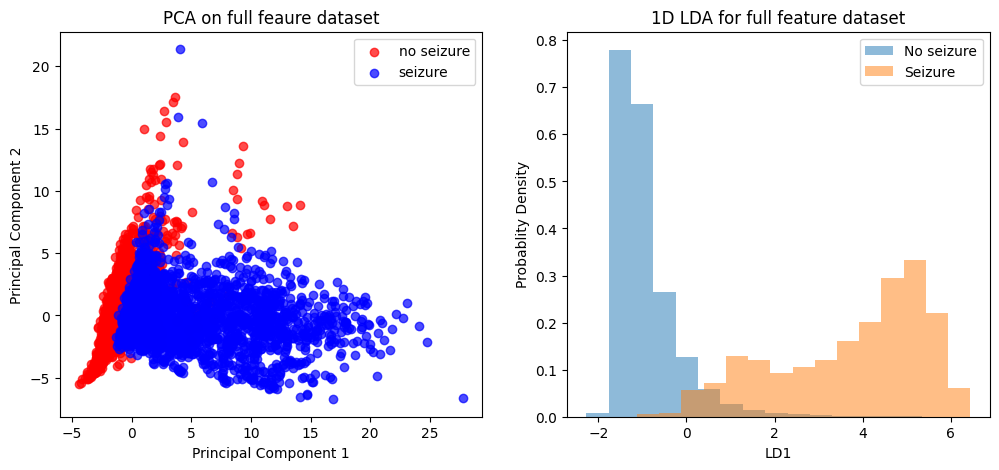

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ["red", "blue"]
for color, label, name in zip(colors, [0, 1], ["no seizure","seizure"]):
    plt.scatter(
        X_pca[y == label, 0],
        X_pca[y == label, 1],
        alpha=0.7,
        color=color,
        label=name
    )
plt.title("PCA on full feaure dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()



plt.subplot(1, 2, 2)
plt.hist(X_lda[y==0], bins=15, alpha=0.5, label='No seizure', density=True)
plt.hist(X_lda[y==1], bins=15, alpha=0.5, label='Seizure', density=True)
plt.title("1D LDA for full feature dataset")
plt.xlabel("LD1")
plt.ylabel("Probablity Density")
plt.legend()
plt.show()

Con una sola componente LDA se separan razonablemente bien. Para PCA seguramente hay que meter más componentes.

Update: scaling data before PCA imporves the results.

Checking explainable variance for each number of PCA of components.

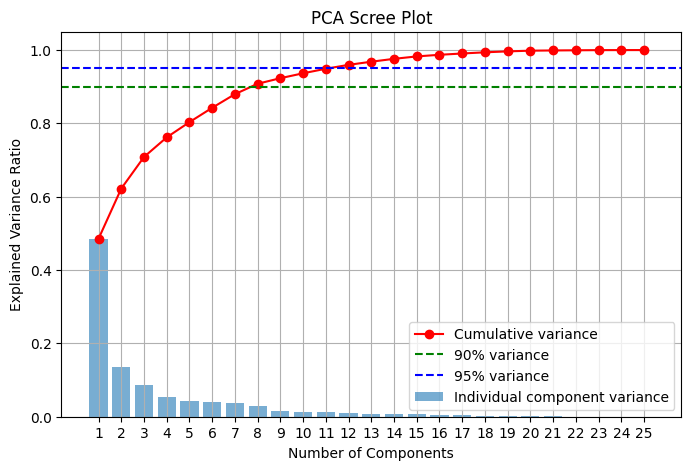

In [9]:
pca = PCA()
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))

# Plot individual explained variance ratios
plt.bar(range(1, len(explained_variance_ratio) + 1),
        explained_variance_ratio,
        alpha=0.6,
        label='Individual component variance')

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1),
         cumulative_explained_variance,
         marker='o',
         color='red',
         label='Cumulative variance')

plt.axhline(y=0.9, color='green', linestyle='--', label='90% variance')
plt.axhline(y=0.95, color='blue', linestyle='--', label='95% variance')

plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid(True)
plt.show()


With the first 7 components we explain 90% of the variance and with the first 10 95%.

In [12]:
explained_variance_ratio

array([4.85396292e-01, 1.36904233e-01, 8.61349266e-02, 5.34722634e-02,
       4.15591832e-02, 3.91097591e-02, 3.71291190e-02, 2.83768373e-02,
       1.51825395e-02, 1.33870318e-02, 1.23945612e-02, 1.05625205e-02,
       8.60205701e-03, 7.86586875e-03, 6.54927922e-03, 4.45756468e-03,
       3.53370739e-03, 3.22281525e-03, 2.52425633e-03, 1.94074911e-03,
       6.09770355e-04, 4.73388014e-04, 4.23250310e-04, 1.24470596e-04,
       6.35561396e-05])

I inlcuded this 3D plot to check the separability of classes with only the first 3 pca components

In [13]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df['label'] = y

label_map = {0: 'no seizure', 1: 'seizure'}
df['label_name'] = df['label'].map(label_map)

fig = px.scatter_3d(
    df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='label_name',         
    symbol='label_name',        
    labels={'color': 'Condition'},  
    title='3D PCA Interactive Plot'
)

fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    legend_title_text='Label'
)

fig.show()
